In [10]:
import datetime
import tushare as ts
import pandas as pd
import numpy as np

In [11]:
def ma(data, n=10, val_name="close"):
    '''
    移动平均线 Moving Average
    MA = (C1+C2+C3+C4+C5+....+Cn)/n （C 为收盘价答，n 为移动平均周期数）

    Parameters
    ------
      data:pandas.DataFrame
                  通过 get_h_data 取得的股票数据
      n:int
                  移动平均线时长，时间单位根据data决定
      val_name:string
                  计算哪一列的列名，默认为 close 收盘值

    return
    -------
      list
          移动平均线
    '''
    values = []
    MA = []

    for index, row in data.iterrows():
        values.append(row[val_name])
#         if len(values) == n:            此处有误
#             del values[0]
        MA.append(np.average(values))
        if len(values) == n:
            del values[0]

#    return np.asarray(MA)
    return np.around(MA,decimals=2)

In [12]:
example_df = pd.read_csv("/Users/zty/Documents/stock_data/historical_data/603393.SH.csv")
example_df = example_df.iloc[::-1,:]

In [40]:
ma30 = ma(example_df, n=30, val_name="close")

In [41]:
ma30

array([23.22, 23.04, 23.07, 22.92, 22.76, 22.52, 22.34, 22.14, 21.98,
       21.89, 21.82, 21.76, 21.69, 21.63, 21.53, 21.4 , 21.27, 21.16,
       21.04, 20.91, 20.83, 20.74, 20.69, 20.61, 20.53, 20.45, 20.38,
       20.32, 20.31, 20.3 , 20.21, 20.12, 20.01, 19.92, 19.83, 19.79,
       19.75, 19.73, 19.72, 19.7 , 19.67, 19.62, 19.57, 19.54, 19.53,
       19.56, 19.59, 19.62, 19.66, 19.72, 19.77, 19.86, 19.92, 19.98,
       20.1 , 20.28, 20.44, 20.56, 20.61, 20.68, 20.72, 20.77, 20.81,
       20.84, 20.87, 20.87, 20.87, 20.86, 20.88, 20.88, 20.89, 20.91,
       20.94, 20.94, 20.93, 20.94, 20.94, 21.01, 21.06, 21.14, 21.2 ,
       21.25, 21.29, 21.36, 21.37, 21.34, 21.31, 21.32, 21.37, 21.37,
       21.44, 21.52, 21.6 , 21.69, 21.65, 21.61, 21.57, 21.53, 21.48,
       21.44, 21.39, 21.35, 21.33, 21.33, 21.32, 21.29, 21.24, 21.11,
       21.  , 20.86, 20.73, 20.59, 20.46, 20.31, 20.18, 20.05, 19.91,
       19.76, 19.61, 19.46, 19.27, 19.08, 18.91, 18.73, 18.69, 18.67,
       18.64, 18.61,

In [47]:
example_df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
410,603393.SH,20210104,23.59,23.59,23.03,23.22,23.62,-0.40,-1.6935,53852.49,125012.493
409,603393.SH,20210105,23.24,23.24,22.76,22.85,23.22,-0.37,-1.5935,54352.46,124361.145
408,603393.SH,20210106,22.89,23.50,22.89,23.14,22.85,0.29,1.2691,43025.29,99708.342
407,603393.SH,20210107,23.08,23.08,22.38,22.48,23.14,-0.66,-2.8522,53121.11,120027.245
406,603393.SH,20210108,22.38,22.38,21.80,22.10,22.48,-0.38,-1.6904,35580.16,78587.186


In [51]:
example_df["close"].tolist()[-1]

24.76

In [54]:
ma30[-1]

24.81

In [13]:
import datetime
import tushare as ts

In [14]:
ts.set_token('409115656486e3f61481103ec280339511aee50ee9026f9b008985ea')
pro = ts.pro_api()
df = pro.daily(trade_date="20220907")

In [60]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20220907,12.42,12.42,12.28,12.33,12.50,-0.17,-1.3600,979812.81,1208329.759
1,000002.SZ,20220907,17.66,17.82,17.40,17.52,17.85,-0.33,-1.8487,883386.10,1550325.356
2,000004.SZ,20220907,9.40,9.40,9.21,9.26,9.40,-0.14,-1.4894,15953.00,14793.834
3,000005.SZ,20220907,1.86,1.88,1.84,1.88,1.87,0.01,0.5348,53025.60,9896.215
4,000006.SZ,20220907,4.45,4.49,4.40,4.48,4.47,0.01,0.2237,143350.16,63829.497


In [15]:
df[df["ts_code"]=="000001.SZ"]

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20220907,12.42,12.42,12.28,12.33,12.5,-0.17,-1.36,979812.81,1208329.759


In [67]:
ma_dict = {"ma5":20,"ma10":30}

In [70]:
np.array(ma_dict.values())

array(dict_values([20, 30]), dtype=object)

In [105]:
raw_df = pd.read_csv("/Users/zty/Documents/stock_data/historical_data/000001.SZ.csv")

In [73]:
raw_df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20210104,19.10,19.10,18.44,18.60,19.34,-0.74,-3.8263,1554216.43,2891682.312
1,000001.SZ,20210105,18.40,18.48,17.80,18.17,18.60,-0.43,-2.3118,1821352.10,3284606.913
2,000001.SZ,20210106,18.08,19.56,18.00,19.56,18.17,1.39,7.6500,1934945.12,3648521.909
3,000001.SZ,20210107,19.52,19.98,19.23,19.90,19.56,0.34,1.7382,1584185.30,3111274.625
4,000001.SZ,20210108,19.90,20.10,19.31,19.85,19.90,-0.05,-0.2513,1195473.22,2348316.363


In [77]:
raw_df.drop([0],inplace=True)

In [17]:
add_df = df[df["ts_code"]=="000001.SZ"]
raw_df.append(add_df, ignore_index = True)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20210106,18.08,19.56,18.00,19.56,18.17,1.39,7.6500,1934945.12,3648521.909
1,000001.SZ,20210107,19.52,19.98,19.23,19.90,19.56,0.34,1.7382,1584185.30,3111274.625
2,000001.SZ,20210108,19.90,20.10,19.31,19.85,19.90,-0.05,-0.2513,1195473.22,2348316.363
3,000001.SZ,20210111,20.00,20.64,20.00,20.38,19.85,0.53,2.6700,1790457.14,3652546.646
4,000001.SZ,20210112,20.39,21.00,20.18,21.00,20.38,0.62,3.0422,1288165.50,2657687.440
...,...,...,...,...,...,...,...,...,...,...,...
408,000001.SZ,20220909,12.40,12.74,12.36,12.72,12.36,0.36,2.9126,1951297.31,2469131.334
409,000001.SZ,20220913,12.88,13.02,12.66,12.95,12.72,0.23,1.8082,1722689.89,2223707.380
410,000001.SZ,20220914,12.75,12.87,12.70,12.73,12.95,-0.22,-1.6988,858035.84,1095054.829
411,000001.SZ,20220914,12.75,12.87,12.70,12.73,12.95,-0.22,-1.6988,858035.84,1095054.829


In [85]:
a=[1,2,3]
b=["a","b","c"]

for c,d in zip(a,b):
    print(c,d)

1 a
2 b
3 c


In [70]:
ts.set_token('409115656486e3f61481103ec280339511aee50ee9026f9b008985ea')
pro = ts.pro_api()
df = pro.daily(trade_date="20220914")

In [71]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20220914,12.75,12.87,12.70,12.73,12.95,-0.22,-1.6988,858035.84,1095054.829
1,000002.SZ,20220914,18.00,18.47,17.84,17.91,18.18,-0.27,-1.4851,743229.85,1342714.911
2,000004.SZ,20220914,9.27,9.35,9.18,9.35,9.33,0.02,0.2144,17399.00,16166.792
3,000005.SZ,20220914,1.85,1.87,1.84,1.87,1.87,0.00,0.0000,75295.60,13957.696
4,000006.SZ,20220914,4.38,4.49,4.38,4.42,4.43,-0.01,-0.2257,142444.00,63333.221


In [73]:
empty_df = df[df["ts_code"]=="000510.SZ"]

In [82]:
empty_df.empty

True

In [100]:
raw_df.index

RangeIndex(start=0, stop=415, step=1)

In [101]:
raw_df.index[0]

0

In [102]:
import mplfinance as mpl

In [106]:
raw_df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20210104,19.10,19.10,18.44,18.60,19.34,-0.74,-3.8263,1554216.43,2891682.312
1,000001.SZ,20210105,18.40,18.48,17.80,18.17,18.60,-0.43,-2.3118,1821352.10,3284606.913
2,000001.SZ,20210106,18.08,19.56,18.00,19.56,18.17,1.39,7.6500,1934945.12,3648521.909
3,000001.SZ,20210107,19.52,19.98,19.23,19.90,19.56,0.34,1.7382,1584185.30,3111274.625
4,000001.SZ,20210108,19.90,20.10,19.31,19.85,19.90,-0.05,-0.2513,1195473.22,2348316.363


In [109]:
raw_df["trade_date"] = pd.to_datetime(raw_df["trade_date"],format='%Y%m%d')

In [389]:
import numpy as np
import mplfinance as mpl
import pandas as pd

def ma(data, n=10, val_name="close"):
    values = []
    MA = []

    for index, row in data.iterrows():
        values.append(row[val_name])
        MA.append(np.average(values))
        ### 确保array长度最大为n
        if len(values) == n:
            del values[0]

    return MA

def ema(data, n=12, val_name="close"):
    past_ema = None
    EMA = []

    for index, row in data.iterrows():
        if index == data.index[0]:
            past_ema = row[val_name]
            EMA.append(row[val_name])
        else:
            today_ema = (2 * row[val_name] + (n - 1) * past_ema) / (n + 1)
            past_ema = today_ema
            EMA.append(today_ema)

    return EMA

def macd(data, quick_n=12, slow_n=26, dem_n=9, val_name="close"):
    ema_quick = np.asarray(ema(data, quick_n, val_name))
    ema_slow = np.asarray(ema(data, slow_n, val_name))
    DIFF = ema_quick - ema_slow
    data["diff"] = DIFF
    DEM = ema(data, dem_n, val_name="diff")
    OSC = DIFF - DEM
    return np.around(DIFF,decimals=3),np.around(DEM,decimals=3), np.around(2*OSC,decimals=3)

def draw_Kline(df,stock_code):
    df.rename(columns={"vol":"volume"},inplace=True)
    df["trade_date"] = pd.to_datetime(df["trade_date"],format='%Y%m%d')
    df.set_index("trade_date", inplace=True)

    # 符合中国习惯的配色风格——红涨绿跌自然是必须实现的第一步
    my_color = mpl.make_marketcolors(up='r',
                                     down='g',
                                     edge='inherit',
                                     wick='inherit',
                                     volume='inherit')
    # 设置图表的背景色
    my_style = mpl.make_mpf_style(marketcolors=my_color,
                                  figcolor='(0.82, 0.83, 0.85)',
                                  gridcolor='(0.82, 0.83, 0.85)')

    df["diff"],df["dem"],df["macd_volume"] = macd(df)
    df["ma120"] = ma(df,n=120)
    df["ma250"] = ma(df,n=250)
    plot_df = df.iloc[-120:,]
    bar_r = np.where(plot_df['macd_volume'] > 0, plot_df['macd_volume'], 0)
    add_plot = [mpl.make_addplot(plot_df[["diff","dem"]],panel=2),
                mpl.make_addplot(plot_df["ma120"], color="grey",panel=0),
                mpl.make_addplot(plot_df["ma250"], color="blue",panel=0),
                mpl.make_addplot(bar_r, type='bar',color="red",panel=2)]
    mpl.plot(plot_df, type = 'candle',style=my_style,figsize=(12, 8),title=stock_code,addplot=add_plot,
                 mav = (5,10,20, 30, 60),volume = True)

In [198]:
def get_history_pro(stock_code, start_date):
#    ts.set_token('409115656486e3f61481103ec280339511aee50ee9026f9b008985ea')
    ts.set_token('9d3281af4abe819ab1a6a7fbdf4c8c0ef5622ffc24edb3f7df572e44')
    pro = ts.pro_api()
    df = pro.daily(ts_code=stock_code, start_date=start_date)
    df = df.iloc[::-1, :]  ### tushare的数据是按时间倒叙排列的，后续分析需要改成顺序
    return df

In [214]:
df = get_history_pro("601888.SH","2018-01-01")

In [209]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
1152,601888.SH,20180102,43.75,44.00,42.82,43.05,43.39,-0.34,-0.78,67986.08,293906.582
1151,601888.SH,20180103,43.53,45.73,42.62,45.68,43.05,2.63,6.11,182387.87,803835.010
1150,601888.SH,20180104,45.35,46.10,44.85,45.47,45.68,-0.21,-0.46,145042.21,659567.833
1149,601888.SH,20180105,45.49,45.60,44.56,45.17,45.47,-0.30,-0.66,71144.93,319351.080
1148,601888.SH,20180108,45.48,46.50,45.00,46.47,45.17,1.30,2.88,128763.91,589506.971


In [420]:
### 东方财富、同花顺的MACD是从股票上市第一天算的，因此算的值会不一样
def find_my_kickpoint_MACD(data,stock_code):
    """
    寻找金叉-死叉-第二次金叉，满足以下特征：
    1）第二次金叉位置比第一次高，但DIFF为负
    2）两次金叉间相隔20个交易日（调整需要时间，定4周）
    3）过程中股价没有20%以上的上涨（确保是底部盘整）
    4）第二次金叉出现后，连续3天macd差值增大（确认上升趋势）
    5）如果第二次金叉不满足，重新往后寻找死叉-金叉

    由于是检测当日收盘是否符合，所以逻辑要反过来：
    1）当天是否是第二次金叉后macd差值连续增大的第三天
    2）定位第二次金叉
    3）往前推死叉-金叉
    4）（严格）出现DIFF为正的金叉/死叉，直接终止（希望下跌中调整）
    5）第一次金叉需要满足：DIFF低于第二次金叉DIFF，未上涨超过20%，两次相隔查过20个交易日
    """
    ### 倒数第四日是金叉，且后3日macd差值增大
    data["diff"], data["dem"], data["macd_volume"] = macd(data)
    macd_volume = data["macd_volume"].tolist()
    diff = data["diff"].tolist()
    close = data["close"].tolist()
    count = len(diff)
    highest_price = close[count - 5]
    ### 确认存在死叉，位置无所谓
    label = 0

    ### 判断第一次的金叉是否满足特征:DIFF低于第二次金叉DIFF，未上涨超过20%，两次相隔查过20个交易日
    def judge_positive_cross(loc, second_loc, highest_price):
        if macd_volume[loc] >= 0 and macd_volume[loc - 1] < 0:
            if diff[loc - 1] > 0:
                return "stop"
            elif diff[loc - 1] < diff[second_loc] and second_loc - loc >= 20 and highest_price / close[loc] < 1.2:
                return "go"
            else:
                pass

    if macd_volume[count - 1] > macd_volume[count - 2] > macd_volume[count - 3] > macd_volume[count - 4] >= 0 and macd_volume[count - 5] < 0 and diff[count - 5] < 0:
        pass
    else:
        return

    for loc in range(count - 5, 1, -1):
        ### 确认存在死叉（倒推角度，diff_value由负转正）
        if label == 1:
            positive_result = judge_positive_cross(loc, count - 4, highest_price)
            if positive_result == "go":
                print("今日%s符合MACD底背离" % (stock_code))
                break
            elif positive_result == "stop":
                break
            else:
                pass
        elif macd_volume[loc] < 0 and macd_volume[loc - 1] >= 0:
            if diff[loc - 1] > 0:
                break
            else:
                label = 1
        else:
            pass

        highest_price = max(highest_price, close[loc])

In [241]:
def get_history_pro2(stock_code, start_date,end_date):
#    ts.set_token('409115656486e3f61481103ec280339511aee50ee9026f9b008985ea')
    ts.set_token('9d3281af4abe819ab1a6a7fbdf4c8c0ef5622ffc24edb3f7df572e44')
    pro = ts.pro_api()
    df = pro.daily(ts_code=stock_code, start_date=start_date,end_date=end_date)
    df = df.iloc[::-1, :]  ### tushare的数据是按时间倒叙排列的，后续分析需要改成顺序
    return df

In [388]:
data = get_history_pro2("600305.SH", "20200101","20220509")

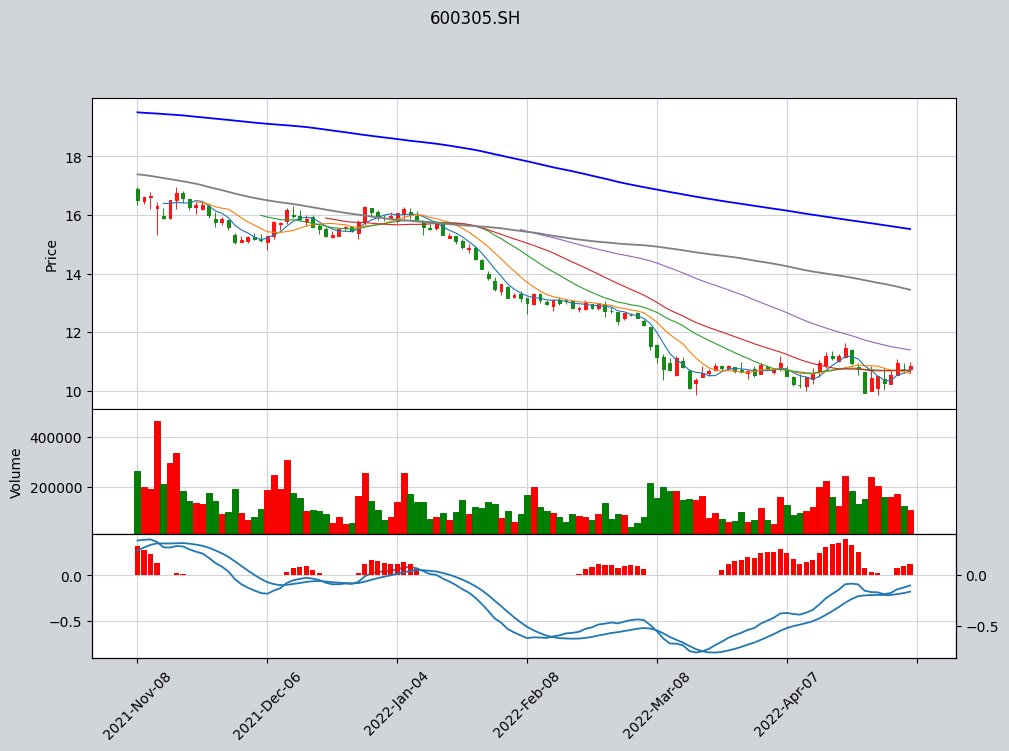

In [390]:
draw_Kline(data,"600305.SH")